In [74]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

from datetime import datetime
from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances
import re
import os
import time

In [90]:
pd.set_option('display.max_colwidth', 1)

In [5]:
df = pd.read_csv("../datasets/df_train_cleaned.csv")
df.head()

,uniqueid,drugName,condition,review,rating,date,usefulCount,month,year,text length,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,ha side effect take combination bystolic and f...,9.0,2012-05-20,27,5,2012,54,1
1,95260,Guanfacine,ADHD,son halfway through his fourth week intuniv be...,8.0,2010-04-27,192,4,2010,606,1
2,92703,Lybrel,Birth Control,used take another oral contraceptive which had...,5.0,2009-12-14,17,12,2009,627,1
3,138000,Ortho Evra,Birth Control,this first time using any form birth control g...,8.0,2015-11-03,10,11,2015,350,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone ha completely turned life around feel...,9.0,2016-11-27,37,11,2016,553,1


In [25]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.10.0


In [26]:
import cufflinks as cf

In [27]:
# For Notebooks
init_notebook_mode(connected=True)

In [28]:
# For offline use
cf.go_offline()

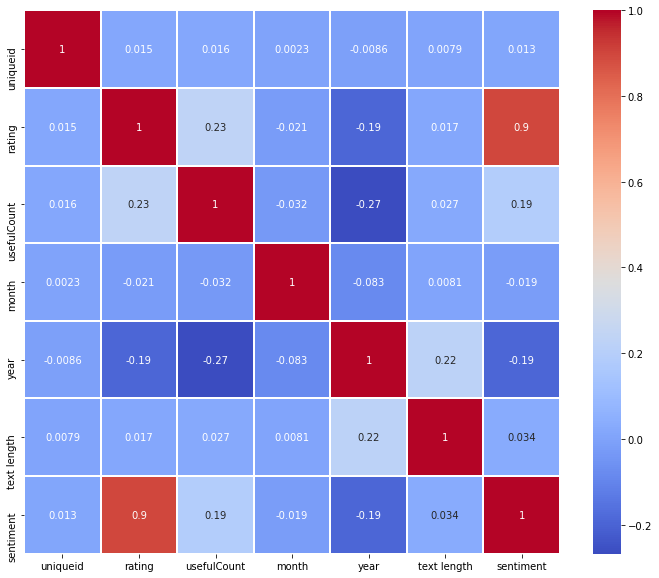

In [97]:
# Lets have an overview of relationship
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linecolor='white', linewidths=1)

## drugName

In [75]:
stopwords = set(STOPWORDS)

In [78]:
# Define a function for wordcloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [121]:
df.drugName.value_counts().iloc[:10].iplot(kind='bar', 
                                           title='Top 10 Most Frequent Drugs',
                                          xTitle='Drug Name',
                                          yTitle='Count',
                                          color='indianred')

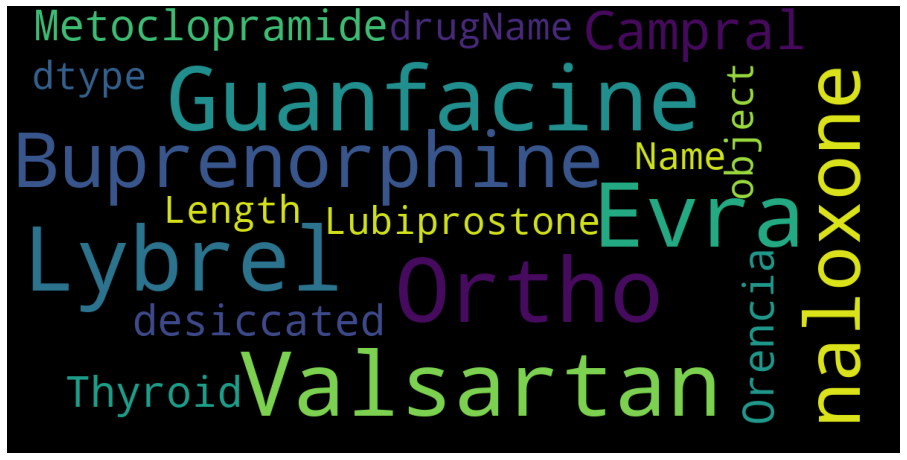

In [81]:
show_wordcloud(df['drugName'])

## Condition

In [120]:
df.condition.value_counts().iloc[:10].iplot(kind='bar', 
                                           title='Top 10 Most Frequent Conditions',
                                          xTitle='Condition',
                                          yTitle='Count',
                                           color='midnightblue')

In [128]:
df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False).iloc[:20].iplot(kind='bar',
                                                                                            title='Number of drugs by condition',
                                                                                            xTitle='condition',
                                                                                            yTitle='Count',
                                                                                            color='springgreen')

In [136]:
df[df['condition']=='3</span> users found this comment helpful.']

84

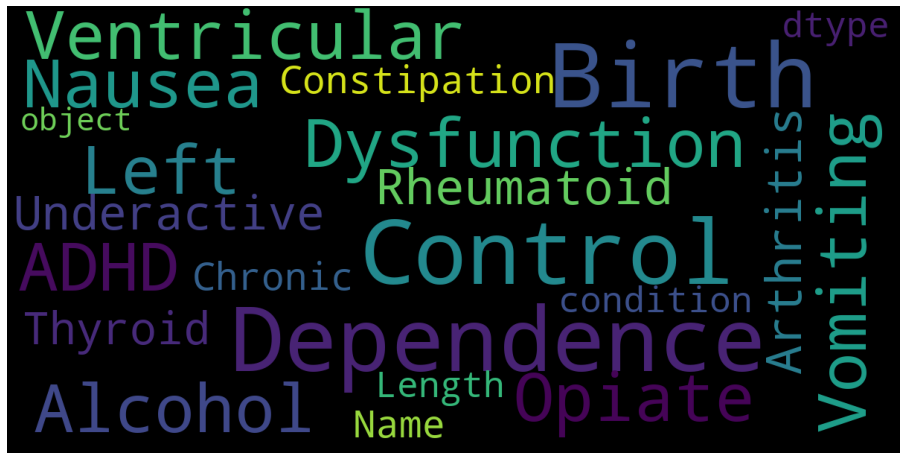

In [80]:
show_wordcloud(df['condition'])

## Review

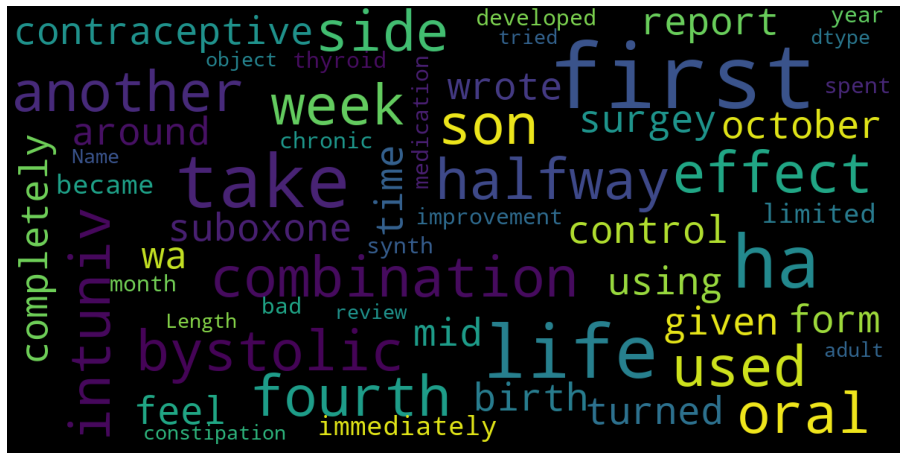

In [79]:
show_wordcloud(df['review'])

In [88]:
df['usefulCount'].sort_values(ascending=False)

6674      1291
33349     1291
21574     1247
4226      1247
145314     949
          ... 
144163       0
126373       0
65222        0
126378       0
58598        0
Name: usefulCount, Length: 160398, dtype: int64

In [102]:
# Lets take a look at the top 
df[df['usefulCount']>=1247].sort_values(by='usefulCount', ascending=False)

,uniqueid,drugName,condition,review,rating,date,usefulCount,month,year,text length,sentiment
6674,96616,Sertraline,Depression,remember reading people opinion online the drug before took and scared away from then finally decided give try and ha been the best choice have made have been for over month and feel great and don have any side effect when first started did notice that hand would tremble but then subsided honestly don listen all the negativity because what doesn work for some work amazing for others based youself and not everyone else may blessing diguise the pill not meant make you all happy lucky and see quot butterfly and rose quot it meant help put the chemical your mind balance you can just who you are and not overly depressed still get sad some time but that normal that life and people take control make change did getting this pill,10.0,2008-07-31,1291,7,2008,731,1
33349,119152,Zoloft,Depression,remember reading people opinion online the drug before took and scared away from then finally decided give try and ha been the best choice have made have been for over month and feel great and don have any side effect when first started did notice that hand would tremble but then subsided honestly don listen all the negativity because what doesn work for some work amazing for others based youself and not everyone else may blessing diguise the pill not meant make you all happy lucky and see quot butterfly and rose quot it meant help put the chemical your mind balance you can just who you are and not overly depressed still get sad some time but that normal that life and people take control make change did getting this pill,10.0,2008-07-31,1291,7,2008,731,1
4226,182560,Mirena,Birth Control,have had iud for over year now and think the best thing ever when first got put only bled for about week with little cramping after that nothing all haven had period for about month until finally got one and it not bad all light cramping headache nothing haven gained weight acne gone and mood are fine know all woman are different but just hear all these horror story and just wanted tell story which good one hope calm some your fear,10.0,2009-04-01,1247,4,2009,436,1
21574,131116,Levonorgestrel,Birth Control,have had iud for over year now and think the best thing ever when first got put only bled for about week with little cramping after that nothing all haven had period for about month until finally got one and it not bad all light cramping headache nothing haven gained weight acne gone and mood are fine know all woman are different but just hear all these horror story and just wanted tell story which good one hope calm some your fear,10.0,2009-04-01,1247,4,2009,436,1


In [99]:
# Lets take a look at the least useful reviews
df[df['usefulCount']==0].head(3)

,uniqueid,drugName,condition,review,rating,date,usefulCount,month,year,text length,sentiment
16,48188,Trimethoprim,Urinary Tract Infection,this drug worked very well for and cleared uti matter hr although wa day course daily unfortunately once the tablet finished the infection returned needed course currently taking low dose evening keep the infection bay while the specialist some test normally get every side effect going and dread taking new medication any form especially after horrific experience with ciorofloxacin but the only side effect experienced with this wa itchy ankle and foot day two but that didn last into third day would class this minor side effect and insignificant good luck,9.0,2017-09-22,0,9,2017,560,1
37,60678,MoviPrep,Bowel Preparation,have taken this least time for the last year have had major problem with since the first time causing major fatigue the last time took wa year ago and had very severe cramp and not having enough time get the bathroom went the hospital and the doctor said didn work good enough had home and second round went back the next day and did the process with energy had last night and wa even worse than the other time wa gagging down and all night with severe cramp tried the second dose the morning and just about started throwing called the office and they said stop once the doctor wa done said didn evacuate enough,2.0,2017-06-29,0,6,2017,612,0
44,111409,Ledipasvir / sofosbuvir,Hepatitis C,initial testing wa over million received med saturday day prior testing establish baseline started when received pill day and hour later got blood test establish had taken pill this point and wa under week wa week wa and week wa week til eot test feel cured side effect were next nothing,10.0,2015-09-22,0,9,2015,288,1


Text(0.5, 0.98, 'Histogram on Text Length')

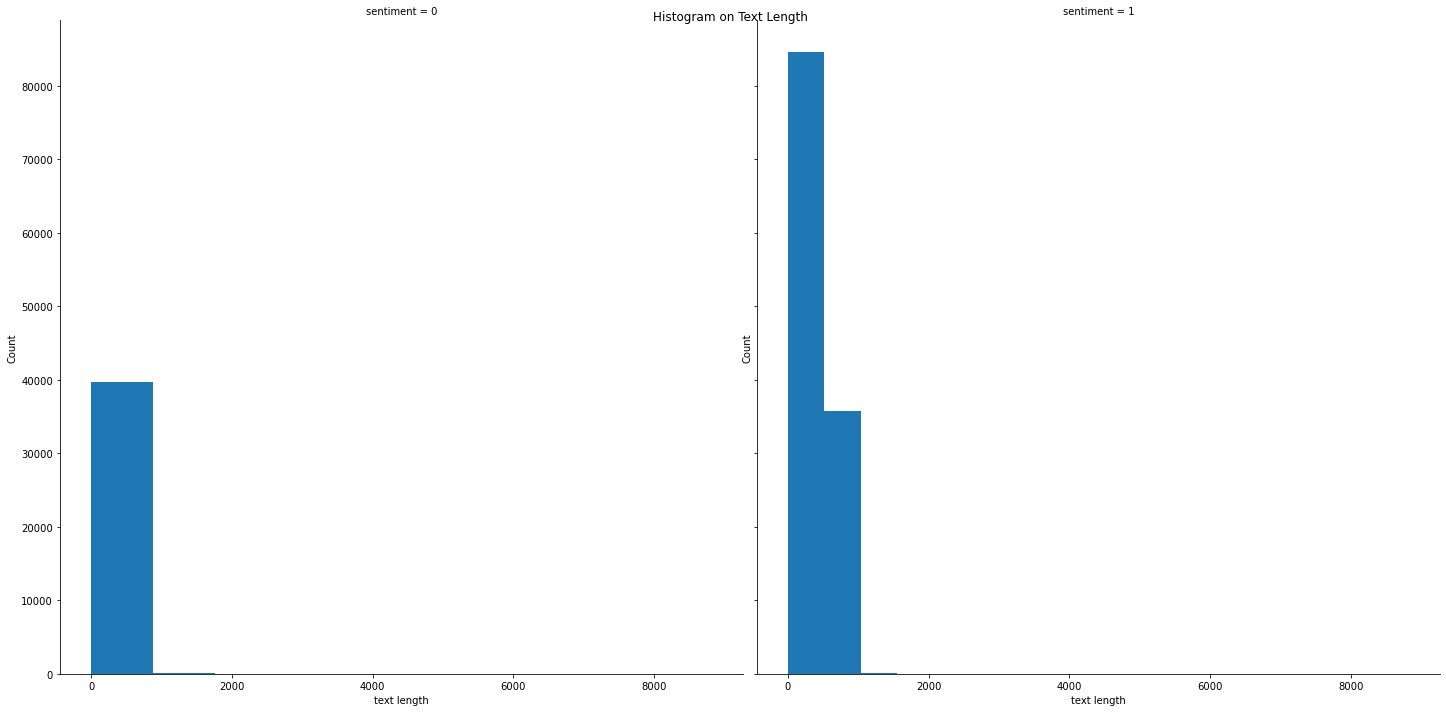

In [108]:
g = sns.FacetGrid(df,col='sentiment', height=10, aspect=1)
g.map(plt.hist,'text length')
g.axes[0,0].set_ylabel('Count')
g.axes[0,1].set_ylabel('Count')
g.fig.suptitle('Histogram on Text Length')

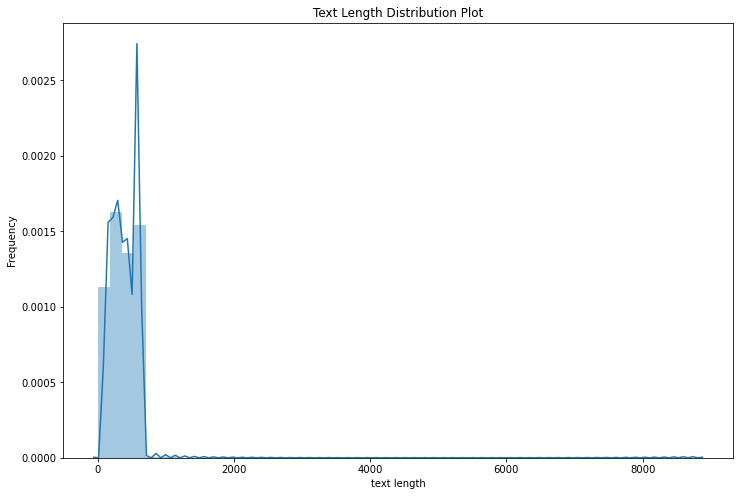

In [109]:
plt.figure(figsize=(12,8))
plt.title('Text Length Distribution Plot')
plt.ylabel('Frequency')
sns.distplot(df['text length'])

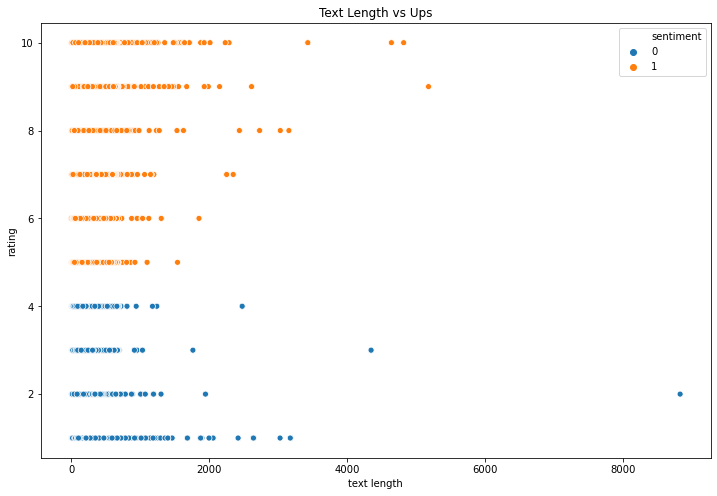

In [110]:
# Lets take alook at text length to ups
# There seems to be three outliers, lets investigate further
plt.figure(figsize=(12,8))
plt.title('Text Length vs Ups')
sns.scatterplot(x='text length',y='rating',data=df, hue='sentiment')

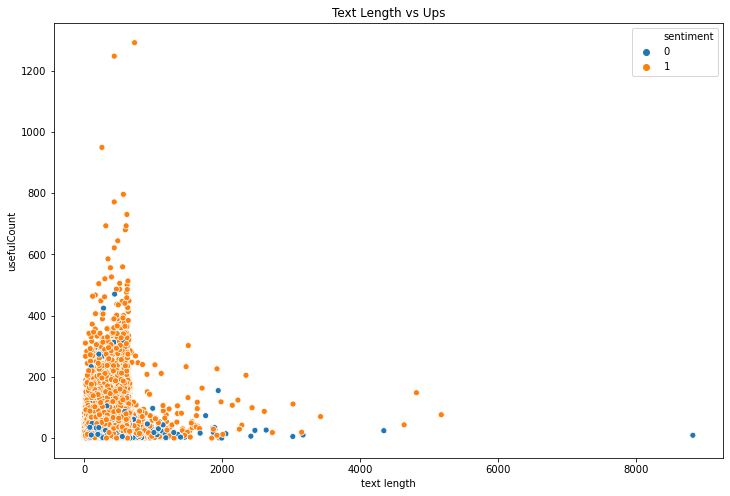

In [111]:
# Lets take alook at text length to ups
# There seems to be three outliers, lets investigate further
plt.figure(figsize=(12,8))
plt.title('Text Length vs Ups')
sns.scatterplot(x='text length',y='usefulCount',data=df, hue='sentiment')

In [119]:
df.rating.value_counts().iplot(kind='bar', 
                               title='Rating Count',
                               xTitle='Rating',
                               yTitle='Count',
                               color='slateblue')